In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics 

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/no_preprocessing')
path_lm = Path('/home/ubuntu/data/autopsy/no_preprocessing')

batch_size=32
drop_mult=0.3
learning_rate= 1e-3
wd=1e-7
num_folds = 5

#folds only include training data
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
#data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [6]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [7]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple_no_preprocessing')

learn.freeze()



In [8]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


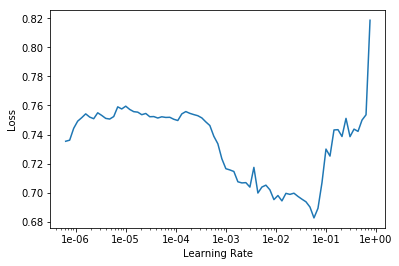

In [9]:
learn.recorder.plot()

In [10]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:18
epoch  train_loss  valid_loss  accuracy
1      0.678981    0.589749    0.759657  (00:05)
2      0.625015    0.567444    0.772532  (00:04)
3      0.596717    0.540608    0.802575  (00:04)
4      0.589873    0.466248    0.789700  (00:04)



In [11]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:50
epoch  train_loss  valid_loss  accuracy
1      0.550406    0.529117    0.798283  (00:09)
2      0.534951    0.429571    0.836910  (00:07)
3      0.531076    0.349013    0.862661  (00:08)
4      0.485976    0.264951    0.884120  (00:09)
5      0.431883    0.272418    0.905579  (00:08)
6      0.437648    0.290865    0.888412  (00:08)
7      0.437006    0.244307    0.896996  (00:08)
8      0.405004    0.329795    0.858369  (00:08)
9      0.375175    0.208624    0.931330  (00:08)
10     0.365680    0.226770    0.901288  (00:09)
11     0.351581    0.269223    0.871245  (00:09)
12     0.343717    0.258550    0.879828  (00:07)
13     0.348270    0.336092    0.871245  (00:07)
14     0.347879    0.306327    0.888412  (00:08)
15     0.336681    0.246187    0.892704  (00:07)
16     0.345805    0.213160    0.909871  (00:08)
17     0.311641    0.236042    0.901288  (00:08)
18     0.359928    0.224045    0.909871  (00:09)
19     0.359845    0.222993    0.909871  (00:08)
20     0.29

In [12]:
learn.validate()

[0.2164437, tensor(0.9142)]

In [13]:
accuracy_list.append(learn.validate()[1].item())

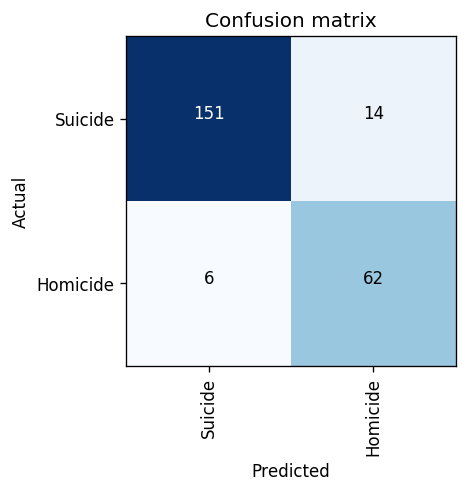

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

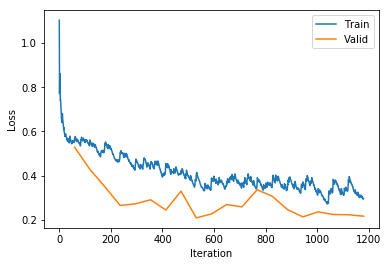

In [15]:
learn.recorder.plot_losses()

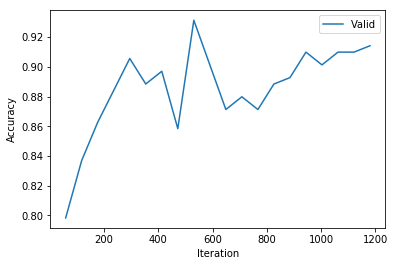

In [16]:
learn.recorder.plot_metrics()

In [17]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple_no_preprocessing')

learn.freeze()



In [18]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


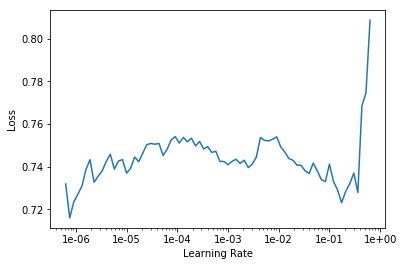

In [19]:
learn.recorder.plot()

In [20]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:18
epoch  train_loss  valid_loss  accuracy
1      0.671830    0.641969    0.648069  (00:04)
2      0.650580    0.520930    0.806867  (00:04)
3      0.609889    0.505622    0.789700  (00:05)
4      0.588518    0.527655    0.716738  (00:04)



In [21]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:57
epoch  train_loss  valid_loss  accuracy
1      0.595094    0.426600    0.845494  (00:09)
2      0.548932    0.408994    0.849785  (00:08)
3      0.499276    0.338667    0.858369  (00:08)
4      0.457323    0.295673    0.879828  (00:08)
5      0.430413    0.249650    0.901288  (00:08)
6      0.423309    0.279515    0.875537  (00:09)
7      0.394263    0.238761    0.901288  (00:08)
8      0.395350    0.226822    0.901288  (00:08)
9      0.386562    0.244867    0.896996  (00:08)
10     0.407255    0.264107    0.884120  (00:07)
11     0.358882    0.276758    0.901288  (00:09)
12     0.350463    0.207360    0.918455  (00:09)
13     0.334044    0.217297    0.896996  (00:08)
14     0.302193    0.215696    0.905579  (00:09)
15     0.278912    0.246107    0.884120  (00:09)
16     0.302773    0.197593    0.918455  (00:09)
17     0.263428    0.244663    0.896996  (00:08)
18     0.292082    0.298712    0.884120  (00:08)
19     0.227668    0.214612    0.914163  (00:09)
20     0.23

In [22]:
learn.validate()

[0.23612325, tensor(0.8841)]

In [23]:
accuracy_list.append(learn.validate()[1].item())

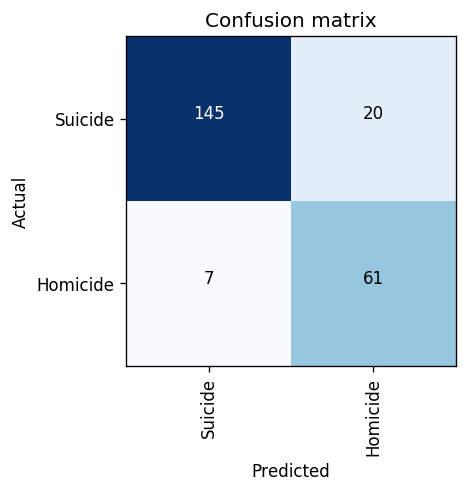

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

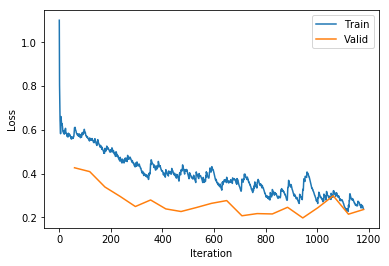

In [25]:
learn.recorder.plot_losses()

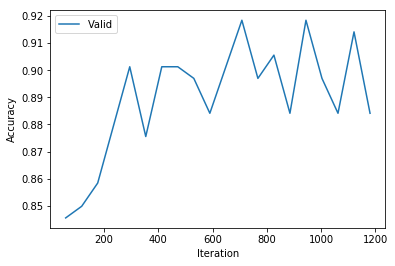

In [26]:
learn.recorder.plot_metrics()

In [27]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple_no_preprocessing')

learn.freeze()



In [28]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


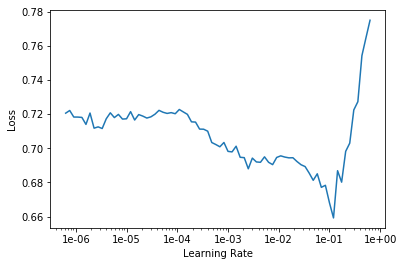

In [29]:
learn.recorder.plot()

In [30]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:20
epoch  train_loss  valid_loss  accuracy
1      0.645597    0.558112    0.781116  (00:04)
2      0.598764    0.554132    0.772532  (00:05)
3      0.594914    0.533739    0.763949  (00:04)
4      0.564403    0.513683    0.759657  (00:04)



In [31]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:52
epoch  train_loss  valid_loss  accuracy
1      0.576272    0.428750    0.845494  (00:08)
2      0.534497    0.478113    0.793991  (00:08)
3      0.505564    0.337836    0.875537  (00:08)
4      0.470025    0.313551    0.871245  (00:09)
5      0.449632    0.274476    0.901288  (00:08)
6      0.412018    0.287622    0.888412  (00:08)
7      0.397733    0.247600    0.892704  (00:09)
8      0.398261    0.290633    0.896996  (00:07)
9      0.353515    0.302824    0.879828  (00:09)
10     0.347072    0.235608    0.905579  (00:09)
11     0.348346    0.251725    0.918455  (00:08)
12     0.309369    0.264017    0.896996  (00:09)
13     0.359260    0.210219    0.879828  (00:08)
14     0.408393    0.229948    0.896996  (00:08)
15     0.349171    0.222658    0.905579  (00:09)
16     0.390693    0.247883    0.914163  (00:07)
17     0.385358    0.259083    0.892704  (00:07)
18     0.315773    0.289675    0.879828  (00:09)
19     0.345221    0.272799    0.888412  (00:07)
20     0.33

In [32]:
learn.validate()

[0.23962799, tensor(0.9142)]

In [33]:
accuracy_list.append(learn.validate()[1].item())

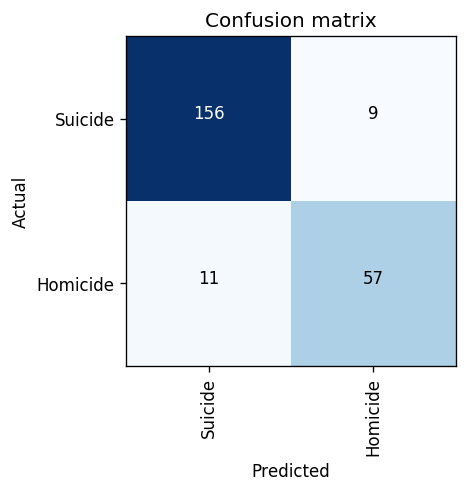

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

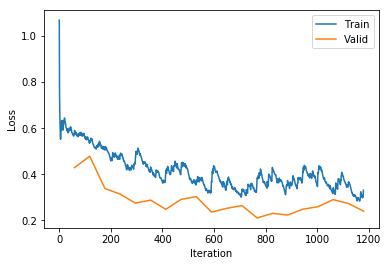

In [35]:
learn.recorder.plot_losses()

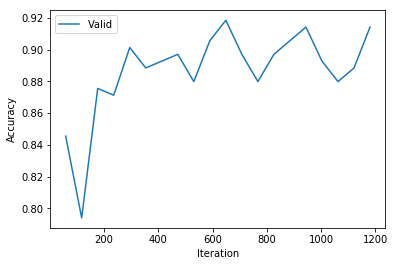

In [36]:
learn.recorder.plot_metrics()

In [37]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple_no_preprocessing')

learn.freeze()



In [38]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


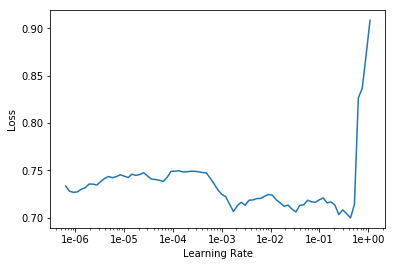

In [39]:
learn.recorder.plot()

In [40]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:18
epoch  train_loss  valid_loss  accuracy
1      0.668172    0.551404    0.763949  (00:04)
2      0.601209    0.508110    0.785408  (00:05)
3      0.591532    0.497417    0.763949  (00:04)
4      0.577903    0.450876    0.785408  (00:04)



In [41]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:48
epoch  train_loss  valid_loss  accuracy
1      0.577934    0.411666    0.849785  (00:08)
2      0.546187    0.363312    0.836910  (00:08)
3      0.517527    0.344242    0.845494  (00:07)
4      0.472445    0.454965    0.785408  (00:09)
5      0.442058    0.288774    0.884120  (00:09)
6      0.468080    0.288482    0.849785  (00:07)
7      0.441168    0.263356    0.888412  (00:08)
8      0.407187    0.269032    0.892704  (00:07)
9      0.396859    0.254988    0.879828  (00:07)
10     0.364712    0.263940    0.896996  (00:08)
11     0.336095    0.252545    0.905579  (00:08)
12     0.320041    0.280496    0.866953  (00:08)
13     0.341001    0.219011    0.896996  (00:08)
14     0.374915    0.215747    0.922747  (00:08)
15     0.308157    0.217261    0.914163  (00:09)
16     0.335354    0.191650    0.909871  (00:08)
17     0.370880    0.220260    0.927039  (00:07)
18     0.322728    0.249270    0.909871  (00:07)
19     0.273958    0.247978    0.892704  (00:09)
20     0.33

In [42]:
learn.validate()

[0.2233363, tensor(0.9142)]

In [43]:
accuracy_list.append(learn.validate()[1].item())

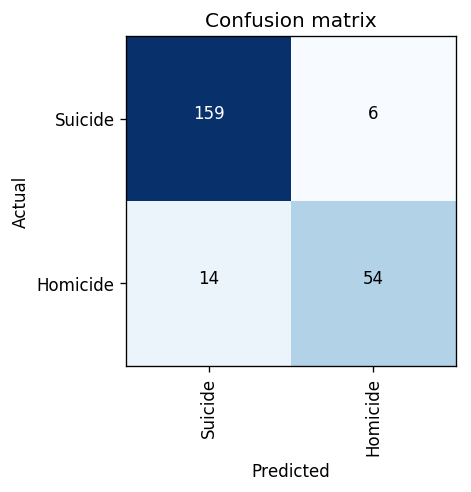

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

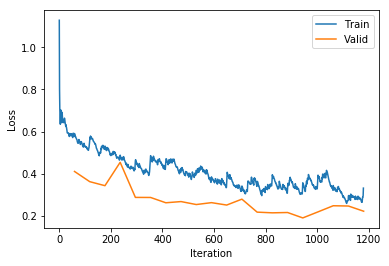

In [45]:
learn.recorder.plot_losses()

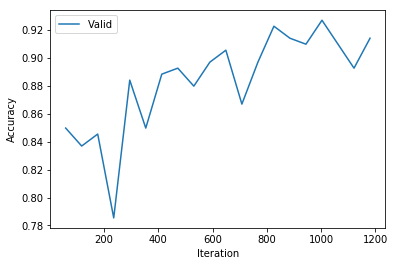

In [46]:
learn.recorder.plot_metrics()

In [47]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple_no_preprocessing')

learn.freeze()



In [48]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


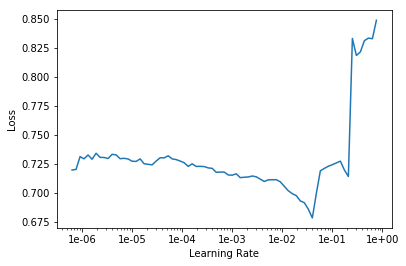

In [49]:
learn.recorder.plot()

In [50]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:18
epoch  train_loss  valid_loss  accuracy
1      0.676708    0.597208    0.733906  (00:04)
2      0.628420    0.531854    0.763949  (00:04)
3      0.592118    0.515219    0.811159  (00:04)
4      0.564613    0.481827    0.785408  (00:04)



In [51]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:41
epoch  train_loss  valid_loss  accuracy
1      0.561481    0.398289    0.828326  (00:09)
2      0.556286    0.377221    0.828326  (00:09)
3      0.508470    0.355081    0.892704  (00:08)
4      0.471056    0.333688    0.884120  (00:08)
5      0.437175    0.304392    0.875537  (00:08)
6      0.409075    0.339838    0.901288  (00:08)
7      0.397390    0.238089    0.918455  (00:08)
8      0.365879    0.229861    0.909871  (00:08)
9      0.361484    0.215344    0.914163  (00:08)
10     0.346846    0.228075    0.914163  (00:08)
11     0.371242    0.262167    0.901288  (00:08)
12     0.345153    0.223608    0.896996  (00:07)
13     0.353134    0.229115    0.909871  (00:08)
14     0.326319    0.229600    0.909871  (00:08)
15     0.365905    0.245589    0.918455  (00:07)
16     0.341596    0.280420    0.892704  (00:08)
17     0.345626    0.206596    0.909871  (00:08)
18     0.343937    0.243041    0.905579  (00:07)
19     0.309067    0.226979    0.914163  (00:05)
20     0.33

In [52]:
learn.validate()

[0.22218777, tensor(0.9099)]

In [53]:
accuracy_list.append(learn.validate()[1].item())

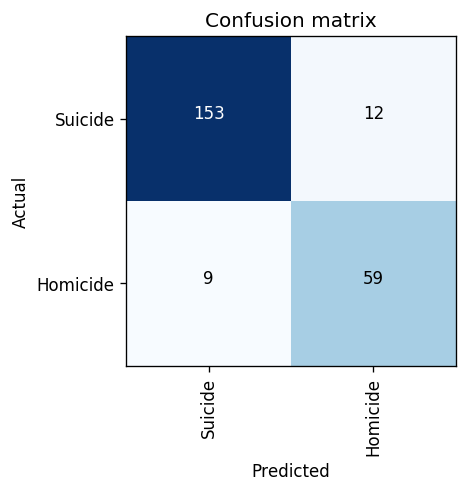

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

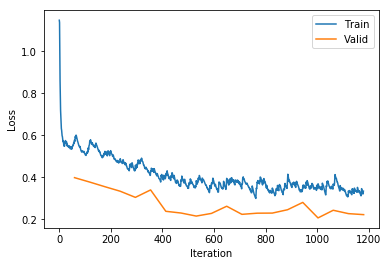

In [55]:
learn.recorder.plot_losses()

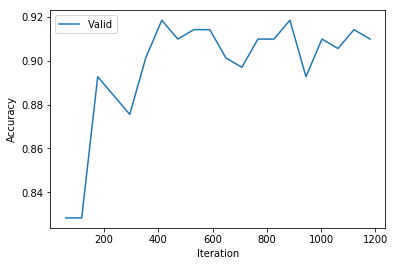

In [56]:
learn.recorder.plot_metrics()

In [57]:
print(accuracy_list)

[0.9141631126403809, 0.8841201663017273, 0.9141631126403809, 0.9141631126403809, 0.9098712205886841]


In [58]:
print(sum(accuracy_list)/len(accuracy_list))

0.9072961449623108


In [59]:
#We are now done doing 5-fold cross validation 

In [60]:
#Now train with all the training data and evaluate with the test data

In [61]:
#data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv',classes=['Suicide','Homicide'])

In [62]:
data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple_no_preprocessing')

learn.freeze()



In [63]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:21
epoch  train_loss  valid_loss  accuracy
1      0.595310    0.570914    0.745174  (00:05)
2      0.568968    0.474198    0.803089  (00:04)
3      0.523550    0.515343    0.776062  (00:05)
4      0.516144    0.424060    0.830116  (00:05)



In [64]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:55
epoch  train_loss  valid_loss  accuracy
1      0.514744    0.341149    0.861004  (00:10)
2      0.449587    0.326363    0.880309  (00:10)
3      0.431343    0.255983    0.895753  (00:09)
4      0.423005    0.226817    0.915058  (00:08)
5      0.399358    0.246150    0.899614  (00:08)
6      0.318428    0.238273    0.915058  (00:09)
7      0.253633    0.299566    0.872587  (00:10)
8      0.274579    0.280309    0.884170  (00:09)
9      0.239282    0.234165    0.899614  (00:10)
10     0.335819    0.195439    0.930502  (00:10)
11     0.351089    0.243577    0.915058  (00:08)
12     0.362336    0.219725    0.907336  (00:08)
13     0.309318    0.249647    0.895753  (00:08)
14     0.299351    0.240119    0.891892  (00:08)
15     0.281794    0.252270    0.891892  (00:08)
16     0.230152    0.239802    0.907336  (00:09)
17     0.245123    0.218201    0.922780  (00:09)
18     0.215860    0.236623    0.911197  (00:06)
19     0.243912    0.210005    0.907336  (00:04)
20     0.29

In [65]:
learn.validate()

[0.19168572, tensor(0.9112)]

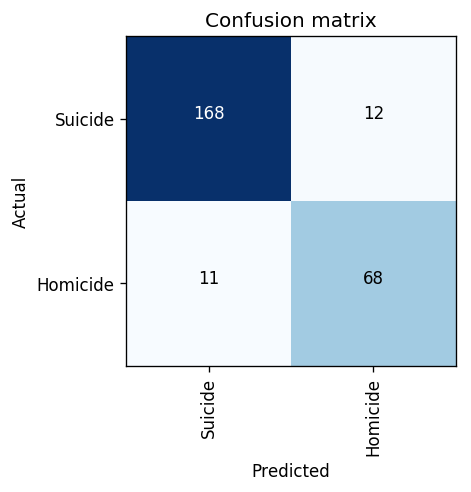

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [67]:
import torch

torch.cuda.empty_cache()

In [3]:
import statistics
list = [85.8, 85.9,85.0]
print(statistics.variance(list))

0.24333333333333457
